### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df_employee = pd.read_csv('employee.csv')
df_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000
5,6,ina,5/6/1991,perempuan,5000000
6,7,nia,4/5/1990,perempuan,2500000
7,8,dodi,4/3/1998,laki-laki,3400000
8,9,dedi,6/20/1993,laki-laki,8900000
9,10,roni,9/20/2001,laki-laki,2100000


### Data Preprocessing

#### Handling Datetime

In [3]:
df_employee['tanggal_lahir'] = pd.to_datetime(df_employee['tanggal_lahir'])
df_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,1993-03-02,perempuan,1000000
1,2,budi,1992-03-01,laki-laki,2000000
2,3,susi,2000-04-05,perempuan,1350000
3,4,wati,1995-05-20,perempuan,10000000
4,5,ati,1994-04-23,perempuan,3400000
5,6,ina,1991-05-06,perempuan,5000000
6,7,nia,1990-04-05,perempuan,2500000
7,8,dodi,1998-04-03,laki-laki,3400000
8,9,dedi,1993-06-20,laki-laki,8900000
9,10,roni,2001-09-20,laki-laki,2100000


### Data Transformation

#### One-hot Encoder

In [4]:
jk_dummies = pd.get_dummies(df_employee['jenis_kelamin'], prefix='jk')
jk_dummies

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [5]:
new_employee = df_employee.copy()
new_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,1993-03-02,perempuan,1000000
1,2,budi,1992-03-01,laki-laki,2000000
2,3,susi,2000-04-05,perempuan,1350000
3,4,wati,1995-05-20,perempuan,10000000
4,5,ati,1994-04-23,perempuan,3400000
5,6,ina,1991-05-06,perempuan,5000000
6,7,nia,1990-04-05,perempuan,2500000
7,8,dodi,1998-04-03,laki-laki,3400000
8,9,dedi,1993-06-20,laki-laki,8900000
9,10,roni,2001-09-20,laki-laki,2100000


In [6]:
new_employee = pd.concat([new_employee, jk_dummies], axis= 1)
new_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,perempuan,1000000,0,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0
2,3,susi,2000-04-05,perempuan,1350000,0,1
3,4,wati,1995-05-20,perempuan,10000000,0,1
4,5,ati,1994-04-23,perempuan,3400000,0,1
5,6,ina,1991-05-06,perempuan,5000000,0,1
6,7,nia,1990-04-05,perempuan,2500000,0,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0


#### Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [8]:
new_employee['jk_label'] = le.fit_transform(new_employee['jenis_kelamin'])
new_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,1993-03-02,perempuan,1000000,0,1,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0,0
2,3,susi,2000-04-05,perempuan,1350000,0,1,1
3,4,wati,1995-05-20,perempuan,10000000,0,1,1
4,5,ati,1994-04-23,perempuan,3400000,0,1,1
5,6,ina,1991-05-06,perempuan,5000000,0,1,1
6,7,nia,1990-04-05,perempuan,2500000,0,1,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0,0


In [9]:
del new_employee['jenis_kelamin']

In [10]:
new_employee

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,1993-03-02,1000000,0,1,1
1,2,budi,1992-03-01,2000000,1,0,0
2,3,susi,2000-04-05,1350000,0,1,1
3,4,wati,1995-05-20,10000000,0,1,1
4,5,ati,1994-04-23,3400000,0,1,1
5,6,ina,1991-05-06,5000000,0,1,1
6,7,nia,1990-04-05,2500000,0,1,1
7,8,dodi,1998-04-03,3400000,1,0,0
8,9,dedi,1993-06-20,8900000,1,0,0
9,10,roni,2001-09-20,2100000,1,0,0


#### Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [12]:
new_employee['sc_gaji'] = sc.fit_transform(new_employee[['gaji']])
new_employee

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji
0,1,ani,1993-03-02,1000000,0,1,1,-1.001779
1,2,budi,1992-03-01,2000000,1,0,0,-0.663911
2,3,susi,2000-04-05,1350000,0,1,1,-0.883525
3,4,wati,1995-05-20,10000000,0,1,1,2.039035
4,5,ati,1994-04-23,3400000,0,1,1,-0.190896
5,6,ina,1991-05-06,5000000,0,1,1,0.349694
6,7,nia,1990-04-05,2500000,0,1,1,-0.494977
7,8,dodi,1998-04-03,3400000,1,0,0,-0.190896
8,9,dedi,1993-06-20,8900000,1,0,0,1.667380
9,10,roni,2001-09-20,2100000,1,0,0,-0.630124


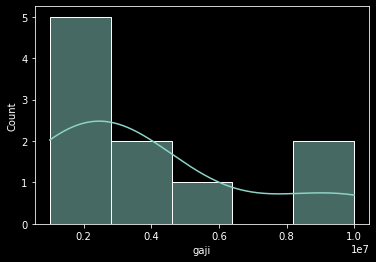

In [13]:
sns.histplot(df_employee['gaji'], kde=True)
plt.show()

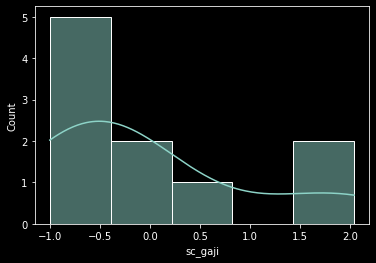

In [14]:
sns.histplot(new_employee['sc_gaji'], kde=True)
plt.show()

In [15]:
new_employee['sc_gaji'].mean()

0.0

#### MinMax Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()

In [17]:
new_employee['mx_gaji'] = mx.fit_transform(new_employee[['gaji']])
new_employee

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji,mx_gaji
0,1,ani,1993-03-02,1000000,0,1,1,-1.001779,0.000000
1,2,budi,1992-03-01,2000000,1,0,0,-0.663911,0.111111
2,3,susi,2000-04-05,1350000,0,1,1,-0.883525,0.038889
3,4,wati,1995-05-20,10000000,0,1,1,2.039035,1.000000
4,5,ati,1994-04-23,3400000,0,1,1,-0.190896,0.266667
5,6,ina,1991-05-06,5000000,0,1,1,0.349694,0.444444
6,7,nia,1990-04-05,2500000,0,1,1,-0.494977,0.166667
7,8,dodi,1998-04-03,3400000,1,0,0,-0.190896,0.266667
8,9,dedi,1993-06-20,8900000,1,0,0,1.667380,0.877778
9,10,roni,2001-09-20,2100000,1,0,0,-0.630124,0.122222


<AxesSubplot:xlabel='mx_gaji', ylabel='Density'>

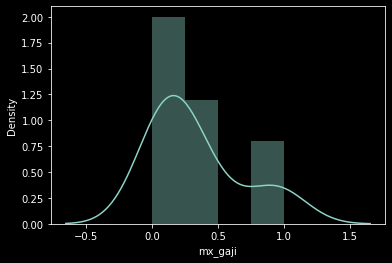

In [18]:
sns.distplot(new_employee['mx_gaji'])